Extend Digits network to hhandwritten characters

Use NIST dataset: EMNIST Letters: 145,600 characters. 26 balanced classes. https://www.nist.gov/itl/products-and-services/emnist-dataset

Play with NN configurations -- number of layers, ssize of layers
Please try to break it
Throw in some random noise
Replace tangent with another function (logit/ sigmioid???)

In [ ]:
# Mount data drive
from google.colab import drive
drive.mount('/data/')
data_dir = '/data/My Drive/EMSE 6575/NeuralNetworkHomework'

Drive already mounted at /data/; to attempt to forcibly remount, call drive.mount("/data/", force_remount=True).


Import the custom built classes that Maks made in last class

In [ ]:
import sys
sys.path.append(data_dir)
#import util as maksNN
from util import Network, FCLayer, ActivationLayer, FCLayer, ActivationLayer, mse, mse_prime
import numpy as np
import pandas as pd

In [ ]:
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

net = Network()
net.add(FCLayer(2,5))
net.add(ActivationLayer())
net.add(FCLayer(5,1))
net.add(ActivationLayer())
net.use(mse, mse_prime)

In [ ]:
err = net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

epoch 1/1000   error=1.582005
epoch 2/1000   error=1.205938
epoch 3/1000   error=1.151335
epoch 4/1000   error=1.136419
epoch 5/1000   error=1.129774
epoch 6/1000   error=1.125437
epoch 7/1000   error=1.121853
epoch 8/1000   error=1.118520
epoch 9/1000   error=1.115250
epoch 10/1000   error=1.111960
epoch 11/1000   error=1.108613
epoch 12/1000   error=1.105192
epoch 13/1000   error=1.101689
epoch 14/1000   error=1.098100
epoch 15/1000   error=1.094424
epoch 16/1000   error=1.090662
epoch 17/1000   error=1.086817
epoch 18/1000   error=1.082892
epoch 19/1000   error=1.078891
epoch 20/1000   error=1.074818
epoch 21/1000   error=1.070680
epoch 22/1000   error=1.066483
epoch 23/1000   error=1.062233
epoch 24/1000   error=1.057938
epoch 25/1000   error=1.053605
epoch 26/1000   error=1.049243
epoch 27/1000   error=1.044859
epoch 28/1000   error=1.040462
epoch 29/1000   error=1.036062
epoch 30/1000   error=1.031665
epoch 31/1000   error=1.027280
epoch 32/1000   error=1.022916
epoch 33/1000   e

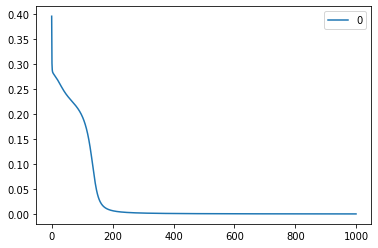

In [ ]:
pd.DataFrame(err).plot()

In [ ]:
out = net.predict(x_train)
print(x_train, out)

[[[0 0]]

 [[0 1]]

 [[1 0]]

 [[1 1]]] [array([[0.00077615]]), array([[0.97744331]]), array([[0.97686514]]), array([[-0.00192492]])]


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 1, 28*28).astype('float32')/255
y_train = np_utils.to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 1, 28*28).astype('float32')/255
y_test = np_utils.to_categorical(y_test)

In [ ]:
net = Network()
net.add(FCLayer(28*28, 100))
net.add(ActivationLayer())
net.add(FCLayer(100, 50)) 
net.add(ActivationLayer())
net.add(FCLayer(50, 10)) 
net.add(ActivationLayer())
net.use(mse, mse_prime)

errors = net.fit(x_train[0:5000], y_train[0:5000], epochs=35, learning_rate=0.1)

epoch 1/35   error=566.724942
epoch 2/35   error=260.354678
epoch 3/35   error=193.446988
epoch 4/35   error=156.475195
epoch 5/35   error=132.408712
epoch 6/35   error=116.610002
epoch 7/35   error=104.013661
epoch 8/35   error=94.216744
epoch 9/35   error=85.762633
epoch 10/35   error=78.746741
epoch 11/35   error=72.836185
epoch 12/35   error=67.864431
epoch 13/35   error=63.404471
epoch 14/35   error=59.213118
epoch 15/35   error=55.701315
epoch 16/35   error=52.567835
epoch 17/35   error=49.948048
epoch 18/35   error=47.599637
epoch 19/35   error=45.246757
epoch 20/35   error=43.319814
epoch 21/35   error=41.587987
epoch 22/35   error=40.430929
epoch 23/35   error=38.700389
epoch 24/35   error=37.469956
epoch 25/35   error=35.925683
epoch 26/35   error=35.044230
epoch 27/35   error=33.750856
epoch 28/35   error=33.149231
epoch 29/35   error=32.035628
epoch 30/35   error=31.672004
epoch 31/35   error=30.374019
epoch 32/35   error=30.145715
epoch 33/35   error=29.162458
epoch 34/35 

In [ ]:
errors=[]
for i in range(1000):
  out=sum((net.predict(x_test[i]) - y_test[i])[0][0])
  errors.append(0 if out<0.5 else 1)
np.mean(errors)

0.038

# Don't really understand what the errors is telling me here ^^^.  So going to do this with Tensor Flow

In [ ]:
import pandas as pd

testing_letter = pd.read_csv(data_dir + '/emnist-letters-test.csv')
training_letter = pd.read_csv(data_dir + '/emnist-letters-train.csv')

In [ ]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [ ]:
#training_letters
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)
#testing_labels
y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


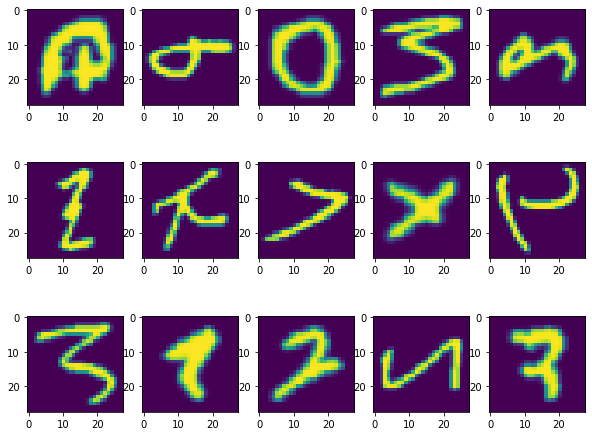

In [ ]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [ ]:
import tensorflow as tf

## Normalize and reshape data

In [ ]:
# Normalise and reshape data
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)


In [ ]:
# Transform labels
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

## Create a CNN for classification

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Add callback API's to save best weights and change learning rate

In [ ]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [ ]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - 106s 47ms/step - loss: 0.8956 - accuracy: 0.7322 - val_loss: 0.3438 - val_accuracy: 0.8902

Epoch 00001: val_accuracy improved from -inf to 0.89020, saving model to Best_points.h5
Epoch 2/10
2220/2220 [==============================] - 104s 47ms/step - loss: 0.2892 - accuracy: 0.9054 - val_loss: 0.3492 - val_accuracy: 0.8941

Epoch 00002: val_accuracy improved from 0.89020 to 0.89409, saving model to Best_points.h5
Epoch 3/10
2220/2220 [==============================] - 104s 47ms/step - loss: 0.2145 - accuracy: 0.9277 - val_loss: 0.3322 - val_accuracy: 0.8988

Epoch 00003: val_accuracy improved from 0.89409 to 0.89876, saving model to Best_points.h5
Epoch 4/10
2220/2220 [==============================] - 107s 48ms/step - loss: 0.1805 - accuracy: 0.9395 - val_loss: 0.3638 - val_accuracy: 0.8962

Epoch 00004: val_accuracy did not improve from 0.89876
Epoch 5/10
2220/2220 [==============================] - 105s 47ms/step - loss: 0.16

## Plot accuracy vs Val_accuract 

Text(0, 0.5, 'Accuray')

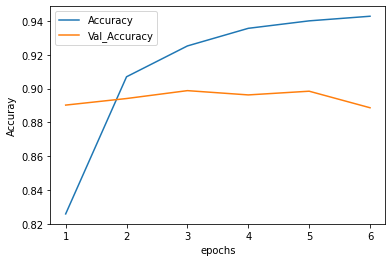

In [ ]:
import seaborn as sns

q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

## Tensor flow was fire.  Now to play with layers and activation functions...

https://www.tensorflow.org/api_docs/python/tf/keras/activations

Changed the middle activation functions from relu to tanh
Changed the final activation function from softmax to sigmoid.


In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='tanh'),
    tf.keras.layers.Dense(128,activation='tanh'),
    tf.keras.layers.Dense(number_of_classes,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - 103s 46ms/step - loss: 0.8980 - accuracy: 0.7351 - val_loss: 0.3919 - val_accuracy: 0.8739

Epoch 00001: val_accuracy improved from -inf to 0.87387, saving model to Best_points.h5
Epoch 2/10
2220/2220 [==============================] - 103s 46ms/step - loss: 0.3119 - accuracy: 0.8962 - val_loss: 0.3087 - val_accuracy: 0.8992

Epoch 00002: val_accuracy improved from 0.87387 to 0.89916, saving model to Best_points.h5
Epoch 3/10
2220/2220 [==============================] - 103s 46ms/step - loss: 0.2266 - accuracy: 0.9247 - val_loss: 0.2862 - val_accuracy: 0.9088

Epoch 00003: val_accuracy improved from 0.89916 to 0.90878, saving model to Best_points.h5
Epoch 4/10
2220/2220 [==============================] - 103s 47ms/step - loss: 0.1772 - accuracy: 0.9380 - val_loss: 0.3258 - val_accuracy: 0.8936

Epoch 00004: val_accuracy did not improve from 0.90878
Epoch 5/10
2220/2220 [==============================] - 103s 47ms/step - loss: 0.14